In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Create High Quality Visual Assets with Imagen and Gemini

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/vision/use-cases/creating_high_quality_visual_assets_with_gemini_and_imagen.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fvision%2Fuse-cases%2Fcreating_high_quality_visual_assets_with_gemini_and_imagen.ipynb">
      <img width="32px" src="https://cloud.google.com/ml-engine/images/colab-enterprise-logo-32px.png" alt="Google Cloud Colab Enterprise logo"><br> Run in Colab Enterprise
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/use-cases/creating_high_quality_visual_assets_with_gemini_and_imagen.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/vision/use-cases/creating_high_quality_visual_assets_with_gemini_and_imagen.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>
</table>


| | |
|-|-|
|Author(s) | [Thu Ya Kyaw](https://github.com/iamthuya) |

## Overview

[Imagen on Vertex AI](https://cloud.google.com/vertex-ai/docs/generative-ai/image/overview) lets developers quickly generate high-quality images from simple text descriptions. Build and edit innovative AI-powered imagery with ease.

### Objectives

In this notebook, you will create high quality visual assets for a restaurant menu using Imagen and Gemini. You will:

- Generate an image prompt with Gemini Pro
- Use Imagen to create high quality images using prompts
- Implement a short pipeline to produce highly-detailed visual assets

### Costs

- This notebook uses billable components of Google Cloud:
  - Vertex AI

- Learn about [Vertex AI pricing](https://cloud.google.com/vertex-ai/pricing) and use the [Pricing Calculator](https://cloud.google.com/products/calculator/) to generate a cost estimate based on your projected usage.

## Getting Started

### Install Vertex AI SDK for Python

In [ ]:
%pip install --quiet --upgrade --user google-cloud-aiplatform

### Restart current runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which restarts the kernel.

In [ ]:
# Restart kernel after installs so that your environment can access the new packages
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel will restart. Please wait until it completes before continuing to the next step. ⚠️</b>
</div>

### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the following cell to authenticate your environment. This step is not required if you are using [Vertex AI Workbench](https://cloud.google.com/vertex-ai-workbench).

In [1]:
import sys

# Additional authentication is required for Google Colab
if "google.colab" in sys.modules:
    # Authenticate user to Google Cloud
    from google.colab import auth

    auth.authenticate_user()

### Define Google Cloud project information and initialize Vertex AI

Initialize the Vertex AI SDK for Python for your project:

In [2]:
# Define project information
PROJECT_ID = "[your-project-id]"  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}

# Initialize Vertex AI
import vertexai

vertexai.init(project=PROJECT_ID, location=LOCATION)

## Image Generation

### Load the image generation model

The model names from Vertex AI Imagen have two components:
* Model name
* Version number

For example, `imagen-3.0-generate-001` represents the **001** version of the **imagen-3.0-generate** model.

`imagen-3.0-generate-001` is also known as [Imagen 3](https://cloud.google.com/vertex-ai/generative-ai/docs/image/overview).


In [3]:
from vertexai.preview.vision_models import ImageGenerationModel

imagen_model = ImageGenerationModel.from_pretrained("imagen-3.0-generate-001")

### Generate your first image

The `generate_image` function is used to generate images.

All you need to input is a simple text prompt.

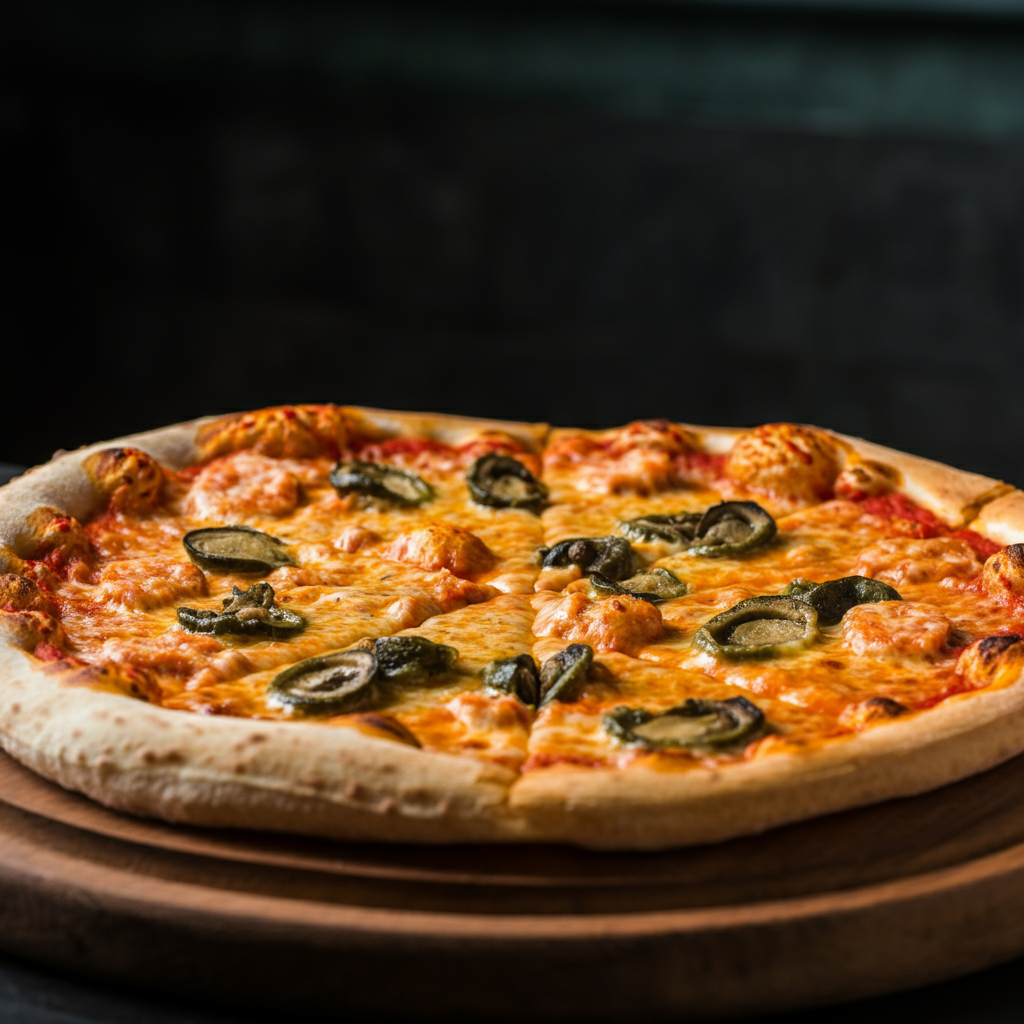

In [4]:
image_prompt = "A delicious pizza"

response = imagen_model.generate_images(
    prompt=image_prompt,
)

response.images[0].show()

### Generating more than one image

You can currently generate up to **4** images at a time with Imagen. Imagen provides several variations based on your prompt.

You will do that in the cell below. An axuillary function to display images in grid is also provided.

In [5]:
import math

import matplotlib.pyplot as plt


# An auxiliary function to display images in grid
def display_images_in_grid(images):
    nrows = math.ceil(len(images) / 4)  # Display at most 4 images per row
    ncols = min(len(images) + 1, 4)  # Adjust columns based on the number of images

    # Create a figure and axes for the grid layout.
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6))

    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i]._pil_image)
            ax.set_aspect("equal")
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            ax.axis("off")

    plt.tight_layout()
    plt.show()

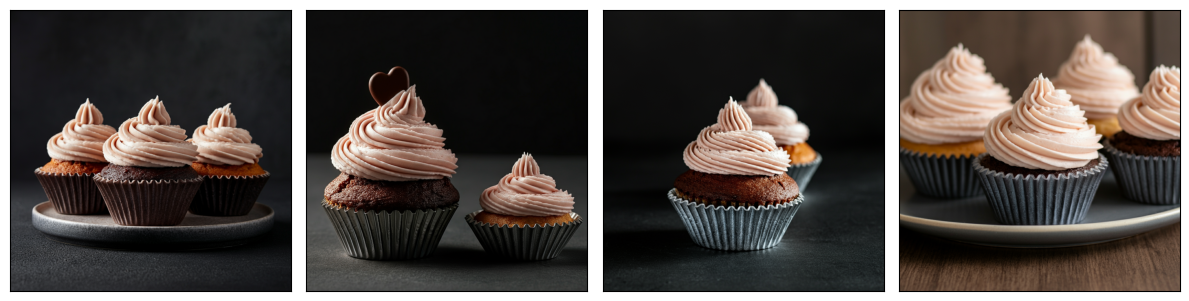

In [6]:
image_prompt = "delicious cupcakes"

response = imagen_model.generate_images(
    prompt=image_prompt,
    number_of_images=4,
)

display_images_in_grid(response.images)

### Load the Gemini Pro model

To load the Gemini 1.5 Pro model, provide `gemini-1.5-pro` as an argument to `GenerativeModel` constructor.

In [7]:
from vertexai.preview.generative_models import GenerativeModel

gemini_pro_model = GenerativeModel("gemini-1.5-pro")

### Use Gemini to generate text content

The `generate_content` function can be used to generate content with Gemini 1.5 Pro model. You just need to provide a simple textual prompt.

In [ ]:
# Provide text prompt and invoke generate_content
text_prompt = "What are the steps to open a restaurant?"

responses = gemini_pro_model.generate_content(
    contents=text_prompt,
    stream=True,
)

for res in responses:
    print(res.text)

To improve the user experience and reproducibility, you will define a generation config and create a function to boostrap content generation with Gemini 1.5 Pro.

In [9]:
from IPython.display import Markdown, display
from vertexai.preview.generative_models import GenerationConfig


# Provide text prompt and invoke generate_content
def generate_content(prompt):
    # Define generation config to improve reproducibility
    generation_config = GenerationConfig(
        temperature=0.5,
        top_p=0.8,
        top_k=10,
        candidate_count=1,
        max_output_tokens=1024,
    )

    responses = gemini_pro_model.generate_content(
        contents=text_prompt,
        generation_config=generation_config,
        stream=True,
    )

    output = ""
    for res in responses:
        output += res.text.strip()

    return output

In [ ]:
text_prompt = "What are the steps to open a restaurant?"
response = generate_content(text_prompt)

display(Markdown(response))

### Generate a restaurant menu with Gemini 1.5 Pro


In [ ]:
text_prompt = (
    "Provide a menu for an Italian restaurant. Give each menu item a brief description."
)
response = generate_content(text_prompt)

display(Markdown(response))

### Improve an existing image prompt with Gemini 1.5 Pro

Here you'll use the image prompt technique of including a **style**, a **subject**, and a **context / background**.

In [ ]:
image_prompt = "A delicious pizza"

prompt_template = """
  Rewrite "{image_prompt}" into an image prompt.
  For example: A sketch of a modern apartment building surrounded by skyscrapers.
  "A sketch" is a style.
  "A modern apartment building" is a subject.
  "Surrounded by skyscrapers" is a context and background.

  Here are a few "styles" to get inspiration from:
  - A studio photo
  - A professional photo

  Here are a few "context and background" to inspiration from:
  - In a kitchen on a wooden surface with natural lighting
  - On a marble counter top with studio lighting
  - In an Italian restaurant

  Rewritten prompt:
"""

text_prompt = prompt_template.format(image_prompt=image_prompt)
rewritten_image_prompt = generate_content(text_prompt)

print(f"PROMPT: {text_prompt}")
print(f"RESPONSE: \n  {rewritten_image_prompt}")

response = imagen_model.generate_images(
    prompt=rewritten_image_prompt,
    number_of_images=4,
)

display_images_in_grid(response.images)

## Visual asset pipeline

Now that you have seen Gemini 1.5 Pro's capabilities to create a complete restaurant menu and how it can enhance the quality of image prompts, the next step is to establish a formal asset pipeline that leverages these abilities.

### Standardize the output as JSON format

In the previous attempts, Gemini 1.5 Pro returned either in Markdown or plaintext responses, which made it difficult to integrate with further steps.

To solve this, we'll ask that Gemini standardize the response in JSON format. This will make the response easier to process and integrate downstream.

In [ ]:
text_prompt = """
  Provide a menu for an Italian restaurant in a JSON fomat.
  Each item in the menu should have a name and a description.
  The item description should contain the ingredients and how the item was prepared.
  Don't include "of the day" items such as "soup of the day".

  The parent fields should be starters, main courses, desserts, and drinks.
  Parent fields should be lower cased.
  The child fields should be name and description.
  Do not include JSON decorator.
  """
response = generate_content(text_prompt)
print(response)

In [ ]:
import json

# Load the responses into a JSON format
jsonized_response = json.loads(response)
jsonized_response["starters"]

### Generating visual asset programmatically

Using the jsonized menu, you will be creating a batch of images programatically using Imagen 3. You will use Gemini 1.5 Pro model to rewrite each description into a detailed image prompt.

In [ ]:
# convert a description into an image prompt
description = jsonized_response["starters"][0]["description"]
text_prompt = prompt_template.format(image_prompt=description)
image_prompt = generate_content(text_prompt)

print(f"DESCRIPTION:\n  {description}\n")
print(f"IMAGE PROMPT:\n  {image_prompt}\n")

Here you will generate **starters** from the menu

In [ ]:
for starter in jsonized_response["starters"]:
    text_prompt = prompt_template.format(image_prompt=starter["description"])
    image_prompt = generate_content(text_prompt)

    print(f"ORIGINAL: {starter['description']}")
    print(f"IMPROVED: {image_prompt}")

    response = imagen_model.generate_images(
        prompt=image_prompt,
        number_of_images=4,
    )

    display_images_in_grid(response.images)
    print()

## Conclusion

Congratulations! You have successfully created a professional restaurant menu with the help of Gemini and Imagen!

Imagen on Vertex AI can do much more that generating realistic images. Imagen allows you to edit images, generate captions, ask questions of images, and more. Explore all the features of Imagen [here](https://cloud.google.com/vertex-ai/docs/generative-ai/image/overview).

You may also explore the Imagen [prompting guide](https://cloud.google.com/vertex-ai/docs/generative-ai/image/img-gen-prompt-guide?_ga=2.128324367.-2094800479.1701746552&_gac=1.219926379.1701161688.CjwKCAiAvJarBhA1EiwAGgZl0LFQUFOFZUxfNPlzjB4T00PDiLeCIEYfY-coLbX9eUfHKr_i8VbtSBoCEJQQAvD_BwE) to enhance your prompting skills. Please note that you need to be allowlisted to see the full guide.